In [1]:
if Sys.iswindows()
    username = "Alex"
    pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
    using Pkg
    Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
else
    username = "sergey"
    pathtorepo = "/home/" *username *"/work/repo/dynamical-systems"
    using Pkg
    Pkg.activate(pathtorepo * "/env/integrate/")
end

  Activating project at `~/work/repo/dynamical-systems/env/integrate`


In [2]:
using JLD, CairoMakie, GLMakie, MAT

In [3]:
cd("/home/sergey/work/repo/dynamical-systems/Tsodyks Markram/Levanova/3 набор параметров")
Λs = load("LSE 300x300  tau_D article2 first map extended.jld2");
Λs = Λs["Λs"];
u0s = load("u0s 300x300  tau_D article2 first map extended.jld2");
u0s = u0s["u0s"];

In [4]:
# BIFURCATION CURVES

cd("/home/sergey/work/repo/dynamical-systems/Tsodyks Markram/Levanova/3 набор параметров/Сопоставление с матконт/файлы matlab")
I0_hom = load("I0_hom_hom.jld")["data"]
u0_hom = load("U0_hom_hom.jld")["data"]
I0_hom = I0_hom[:]
u0_hom = u0_hom[:]

I0_hom_st = load("I0_hom_stump.jld")["data"]
u0_hom_st = load("U0_hom_stump.jld")["data"]
I0_hom_st = I0_hom_st[:]
u0_hom_st = u0_hom_st[:]

I0_Fold = load("I0_Fold.jld")["data"]
U0_Fold = load("U0_Fold.jld")["data"]
I0_Fold = I0_Fold[:]
U0_Fold = U0_Fold[:]

I0_hom_bt = load("I0_hom_bt.jld")["data"]
U0_hom_bt = load("U0_hom_bt.jld")["data"]
I0_hom_bt = I0_hom_bt[:]
U0_hom_bt = U0_hom_bt[:];

index_start_hom_bt = 1; index_end_hom_bt = 8000

cd("/home/sergey/work/repo/dynamical-systems/Tsodyks Markram/Levanova/3 набор параметров/bifurcationkit")

hp_codim2_1 = load("hp_codim2_1.jld2")
hp_codim2_1I0 = hp_codim2_1["I0"]
hp_codim2_1U0 = hp_codim2_1["U0"]

sn_codim2_1 = load("sn_codim2_1.jld2")
sn_codim2_1I0 = sn_codim2_1["I0"]
sn_codim2_1U0 = sn_codim2_1["U0"];

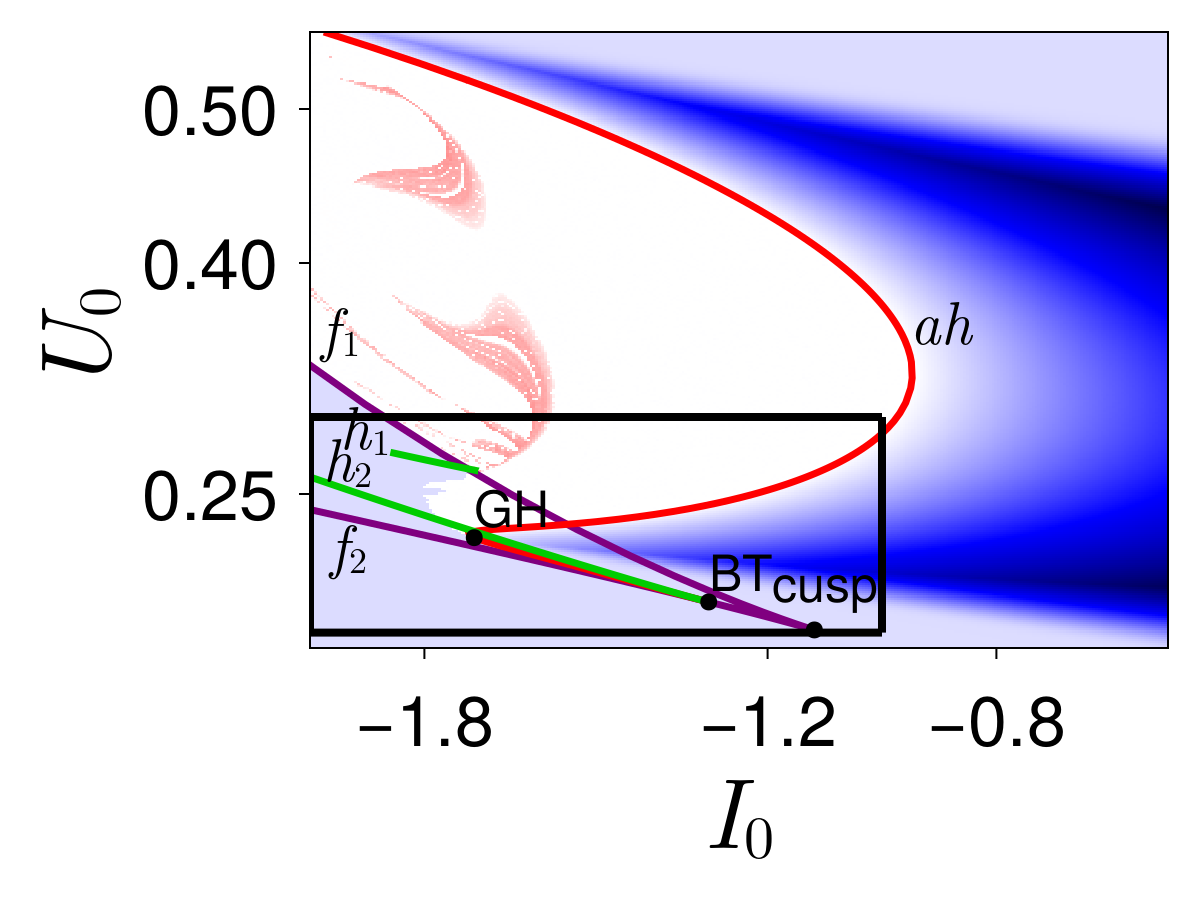

In [5]:
I0range = range( -0.5, -2.0,  length = 300 );
U0range = range( 0.15,  0.55, length = 300 );

index = 1
I0st, I0ed = 1, 300
U0st, U0ed = 1, 300
absmax = maximum(abs.(Λs[I0st:I0ed, U0st:U0ed, index]))

mn, mx =  -absmax, absmax

ticksize = 35
tickpad = 10.0
textsize = 25
textsizecurve = 30
lw = 3.5
mksize = 12

CairoMakie.activate!()
f = Figure()
ax = Axis(f[1, 1], xlabel = L"I_0",ylabel = L"U_0", xlabelsize = 50, ylabelsize = 50,
            xticklabelsize = ticksize, yticklabelsize = ticksize,
            xgridvisible  = false, ygridvisible = false,
            xticklabelpad = tickpad, yticklabelpad = tickpad, xticks = [-1.8, -1.2, -0.8], yticks = [0.25, 0.4, 0.5])

hm = heatmap!(ax, I0range[I0st:I0ed], U0range[U0st:U0ed], Λs[I0st:I0ed, U0st:U0ed, index], colormap = :seismic,
                 colorrange = (mn, mx))

mkrsize = 15
#--------------------------------------------------------------------------------------
lines!(ax, sn_codim2_1I0, sn_codim2_1U0, label = "Fold", linewidth = lw, color = :purple)
text!(ax, -1.98, 0.335,  text = L"f_1", fontsize = textsizecurve, color = :black)
text!(ax, -1.9, 0.234, text = L"f_2", fontsize = textsizecurve, color = :black, align = (:right, :top))
#--------------------------------------------------------------------------------------
lines!(ax, hp_codim2_1I0, hp_codim2_1U0, label = "Hopf", linewidth = lw, color = :red)
text!(ax, hp_codim2_1I0[110], hp_codim2_1U0[110], text = L"ah", fontsize = textsizecurve, color = :black)
#--------------------------------------------------------------------------------------
colorhom = :green3
lines!(ax, I0_hom, u0_hom, label = "Homoclinic", color = colorhom, linewidth = lw)
text!(ax, I0_hom[end], u0_hom[end], text = L"h_1", fontsize = textsizecurve, align = (:right, :baseline), offset = (0, -5))

lines!(ax, I0_hom_bt[index_start_hom_bt:index_end_hom_bt], U0_hom_bt[index_start_hom_bt:index_end_hom_bt], color = colorhom, linewidth = lw)
text!(ax, -1.978, 0.25, text = L"h_2", fontsize = textsizecurve)

#--------------------------------------------------------------------------------------
scatter!(ax, -1.1182463005483, 0.161724273501619, markersize = mksize, color = :black)
text!(ax, -1.1, 0.16, text = "cusp", fontsize = textsize, align = (:center, :bottom), offset = (0, 10))

scatter!(ax, -1.30295711421099, 0.179884505801528, markersize = mksize, color = :black)
text!(ax, -1.30295711421099, 0.179884505801528, text = "BT", fontsize = textsize)

scatter!(ax, -1.71286533418216, 0.221636390745317, markersize = mksize, color = :black)
text!(ax, -1.71286533418216, 0.221636390745317, text = "GH", fontsize = textsize)
#--------------------------------------------------------------------------------------
lines!([-1.0, -2.0], [0.3, 0.3], color = :black, linewidth = 4.0)
lines!([-1.0, -2.0], [0.16, 0.16], color = :black, linewidth = 4.0)
lines!([ -1.0, -1.0], [0.3, 0.16], color = :black, linewidth = 4.0)
lines!([-2.0, -2.0], [0.3, 0.16], color = :black, linewidth  =4.0)
#--------------------------------------------------------------------------------------
xlims!(-2.0, -0.5)
ylims!(0.15,  0.55)
#--------------------------------------------------------------------------------------
f

In [6]:
LPC = matopen("/home/sergey/MEGA/MatCont7p4/Systems/TM_reduce/diagram/GH_LPC forward.mat")
x_matrix = read(LPC, "x")
U0_LPC = x_matrix[1325, :]
I0_LPC = x_matrix[1326, :]

885-element Vector{Float64}:
 -1.7131665498471023
 -1.713167436478815
 -1.7131677067778002
 -1.7131680592061698
 -1.7131685179036
 -1.713169111474053
 -1.7131698873018169
 -1.713170895573645
 -1.7131722122355002
 -1.7131739257503964
  ⋮
 -2.0358175140683854
 -2.036540550658348
 -2.0372642467895705
 -2.037988601322271
 -2.0387127673345864
 -2.0394375876736612
 -2.040163061337955
 -2.040888363187042
 -2.0416143143621035

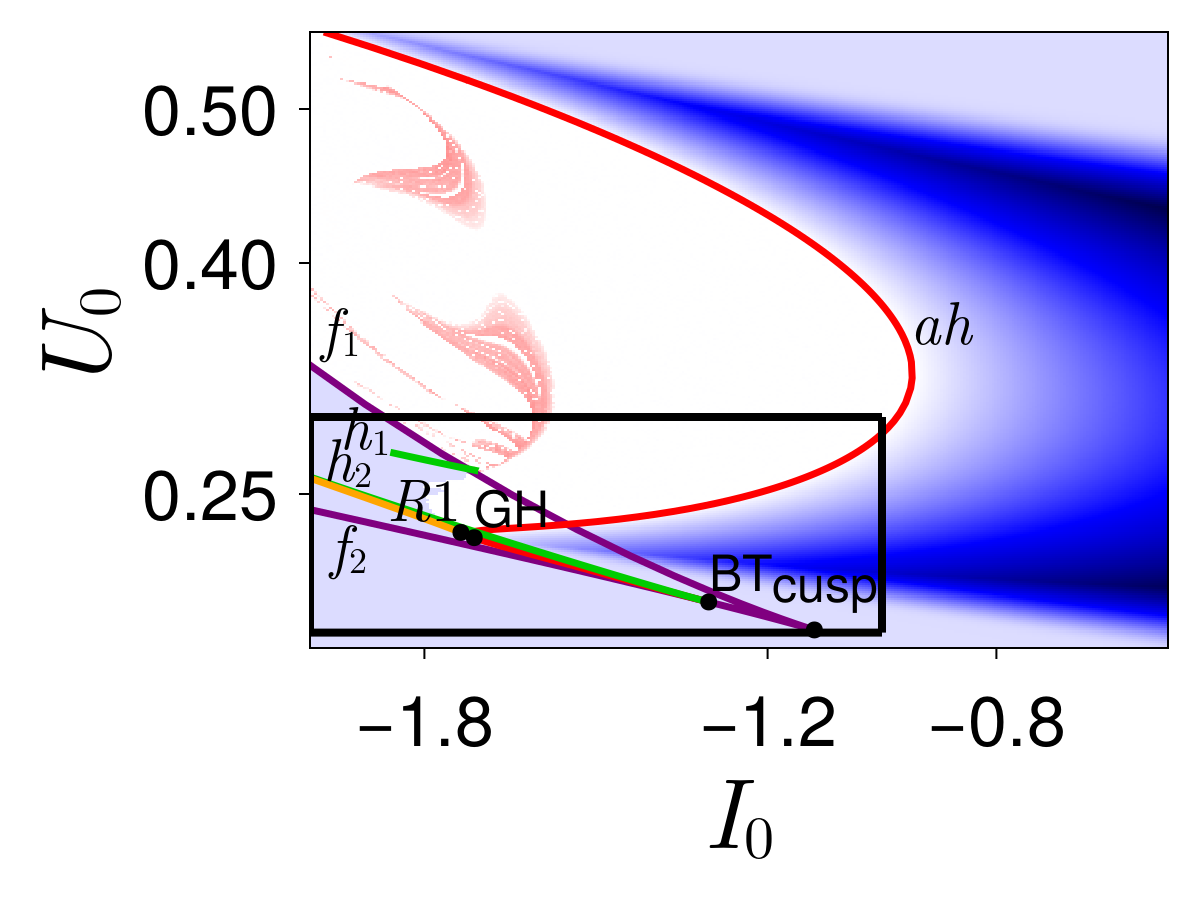

In [10]:
I0range = range( -0.5, -2.0,  length = 300 );
U0range = range( 0.15,  0.55, length = 300 );

index = 1
I0st, I0ed = 1, 300
U0st, U0ed = 1, 300
absmax = maximum(abs.(Λs[I0st:I0ed, U0st:U0ed, index]))

mn, mx =  -absmax, absmax

ticksize = 35
tickpad = 10.0
textsize = 25
textsizecurve = 30
lw = 3.5
mksize = 12

colorLPC = :orange1

CairoMakie.activate!()
f = Figure()
ax = Axis(f[1, 1], xlabel = L"I_0",ylabel = L"U_0", xlabelsize = 50, ylabelsize = 50,
            xticklabelsize = ticksize, yticklabelsize = ticksize,
            xgridvisible  = false, ygridvisible = false,
            xticklabelpad = tickpad, yticklabelpad = tickpad, xticks = [-1.8, -1.2, -0.8], yticks = [0.25, 0.4, 0.5])

hm = heatmap!(ax, I0range[I0st:I0ed], U0range[U0st:U0ed], Λs[I0st:I0ed, U0st:U0ed, index], colormap = :seismic,
                 colorrange = (mn, mx))

mkrsize = 15
#--------------------------------------------------------------------------------------
lines!(ax, sn_codim2_1I0, sn_codim2_1U0, label = "Fold", linewidth = lw, color = :purple)
text!(ax, -1.98, 0.335,  text = L"f_1", fontsize = textsizecurve, color = :black)
text!(ax, -1.9, 0.234, text = L"f_2", fontsize = textsizecurve, color = :black, align = (:right, :top))
#--------------------------------------------------------------------------------------
lines!(ax, hp_codim2_1I0, hp_codim2_1U0, label = "Hopf", linewidth = lw, color = :red)
text!(ax, hp_codim2_1I0[110], hp_codim2_1U0[110], text = L"ah", fontsize = textsizecurve, color = :black)
#--------------------------------------------------------------------------------------
colorhom = :green3
lines!(ax, I0_hom, u0_hom, label = "Homoclinic", color = colorhom, linewidth = lw)
text!(ax, I0_hom[end], u0_hom[end], text = L"h_1", fontsize = textsizecurve, align = (:right, :baseline), offset = (0, -5))

lines!(ax, I0_hom_bt[index_start_hom_bt:index_end_hom_bt], U0_hom_bt[index_start_hom_bt:index_end_hom_bt], color = colorhom, linewidth = lw)
text!(ax, -1.978, 0.25, text = L"h_2", fontsize = textsizecurve)

#--------------------------------------------------------------------------------------
lines!(ax, I0_LPC, U0_LPC, color = colorLPC, linewidth = lw)
scatter!(ax, -1.7361945, 0.22505084, markersize = mksize, color = :black)
text!(ax, -1.7361945, 0.22505084, text = L"R1", fontsize = textsizecurve, align = (:right, :baseline))

#--------------------------------------------------------------------------------------
scatter!(ax, -1.1182463005483, 0.161724273501619, markersize = mksize, color = :black)
text!(ax, -1.1, 0.16, text = "cusp", fontsize = textsize, align = (:center, :bottom), offset = (0, 10))

scatter!(ax, -1.30295711421099, 0.179884505801528, markersize = mksize, color = :black)
text!(ax, -1.30295711421099, 0.179884505801528, text = "BT", fontsize = textsize)

scatter!(ax, -1.71286533418216, 0.221636390745317, markersize = mksize, color = :black)
text!(ax, -1.71286533418216, 0.221636390745317, text = "GH", fontsize = textsize)

#--------------------------------------------------------------------------------------
lines!([-1.0, -2.0], [0.3, 0.3], color = :black, linewidth = 4.0)
lines!([-1.0, -2.0], [0.16, 0.16], color = :black, linewidth = 4.0)
lines!([ -1.0, -1.0], [0.3, 0.16], color = :black, linewidth = 4.0)
lines!([-2.0, -2.0], [0.3, 0.16], color = :black, linewidth  =4.0)
#--------------------------------------------------------------------------------------
xlims!(-2.0, -0.5)
ylims!(0.15,  0.55)
#--------------------------------------------------------------------------------------
f

In [8]:
#=pathtosave = "C:\\Users\\Alex\\Desktop\\TM model\\"
filename = "\\LS_extended.eps"
fullpath = pathtosave * filename 
save(fullpath, f)=#